# Let's start a MLP with Keras here

### NOTE : Checker qu'on demande bien 9 (et pas 10) classes en sortie ! 

## 1) Libraries

In [3]:
#MAIN LIB : 
from Classify_Symbols.classify_lib import *

In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [1]:
#KERAS LIB :
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model

In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\etaxi\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
Using TensorFlow backend.


## 2) Load data  (+ reshape as it's for the CNN, it must see the 2D structure ! )

In [5]:
with open('digits_augmented_dataset_V1.pickle', 'rb') as handle:
    [Xtrain, Ytrain, Xtest, Ytest, Xkilian, Ykilian] = pickle.load(handle)
    
Xtrain_CNN = np.copy( Xtrain.reshape( (Xtrain.shape[0], 28, 28, 1) ) )
Xtest_CNN =  np.copy( Xtest.reshape(  (Xtest.shape[0],  28, 28, 1) ) )
    
print("Shapes :   Xtrain{}  Ytrain{}  Xtest{}  Ytest{}".format(Xtrain_CNN.shape, Ytrain.shape, Xtest_CNN.shape, Ytest.shape))
print("Shapes :   Xkilian{}  Ykilian{}".format(Xkilian.shape, Ykilian.shape))

Shapes :   Xtrain(600000, 28, 28, 1)  Ytrain(600000, 9)  Xtest(100000, 28, 28, 1)  Ytest(100000, 9)
Shapes :   Xkilian(1002, 784)  Ykilian(1002,)



## 3) CNN 

In [4]:
#6-layer 784-40-80-500-1000-2000-10
#6-layer 784-50-100-500-1000-10-10

def make_CNN_model_1():   #create model
  CNN_inputs = Input(shape=(28,28,1))
  kernel_size = 3
  K = Ytrain.shape[1] #nb_classes
  
  model = Sequential()
  model.add(Conv2D(100, kernel_size=kernel_size, activation='relu', input_shape=(28,28,1)))
  model.add(Conv2D(50, kernel_size=kernel_size, activation='relu'))
  model.add(Conv2D(20, kernel_size=kernel_size, activation='relu'))
  #model.add(Conv2D(500, kernel_size=kernel_size, activation='relu'))
  #model.add(Conv2D(500, kernel_size=kernel_size, activation='relu')) #should be 1000
  model.add(Conv2D(K, kernel_size=kernel_size, activation='relu'))
  model.add(Flatten())
  model.add(Dense(K, activation='softmax'))
  #compile model using accuracy to measure model performance
  #model = Model(inputs=CNN_inputs, outputs=y)
  return model

In [5]:
model = make_CNN_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#model.summary() #show the current structure of the network
nb_test = 10000 #we do not take the whole test set as it is huge and we save some time
nb_epoch = 1
batch_size = 32
verbose = 1
h = model.fit( Xtrain_CNN, Ytrain, validation_data=(Xtest_CNN[:nb_test,:,:,:], Ytest[:nb_test,:]), 
              epochs=nb_epoch, batch_size = batch_size, verbose=verbose) # ,batch_size = 



Instructions for updating:
Use tf.cast instead.
Train on 600000 samples, validate on 10000 samples
Epoch 1/1
600000/600000 [==============================] - 2721s 5ms/step - loss: 0.3399 - acc: 0.8932 - val_loss: 0.2288 - val_acc: 0.9304


NameError: name 'X_test_CNN' is not defined

In [7]:
scores = model.evaluate(Xtest_CNN, Ytest, verbose=0) # Final evaluation of the model
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 7.45%


### 3.2) Accuracy curves

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


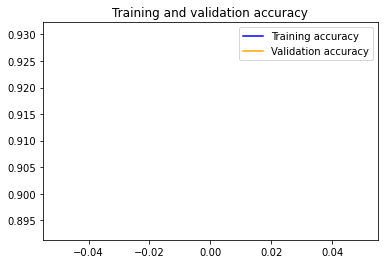

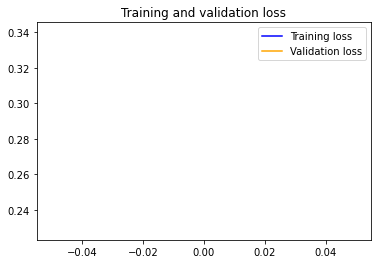

In [8]:
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 3.3) Test On augmented Kilian Dataset

In [50]:
my_pred = np.zeros( (Xkilian_CNN.shape[0]) )
for i, el in enumerate(np.copy(model.predict(Xkilian_CNN))):
  my_idx = np.copy(np.where(el== np.amax(el)))
  my_pred[i] = np.copy(my_idx[0])
print("On Kilian dataset, we get {} errors over {} datas.  Accuracy = {}".format(
  np.sum(~(my_pred==Ykilian)), Xkilian_CNN.shape[0],np.round(1-np.sum(~(my_pred==Ykilian))/Xkilian_CNN.shape[0],2) ))

On Kilian dataset, we get 69 errors over 1002 datas.  Accuracy = 0.93


In [54]:
Xkilian_CNN[~(my_pred==Ykilian)]

(69, 28, 28, 1)

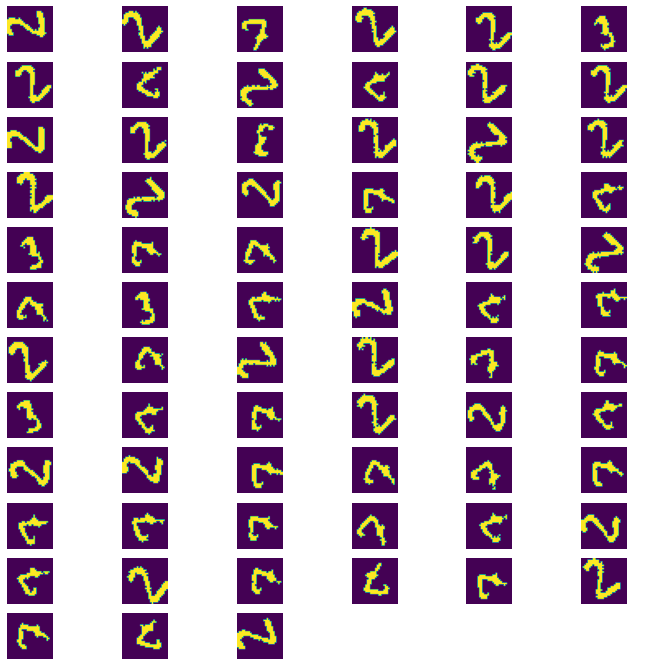

In [57]:
#to show the pictures for which the CNN failed :
plot_pic( [i.reshape( (28,28) ) for i in Xkilian_CNN[~(my_pred==Ykilian)] ], NB_COL = 10 )

### 3.4) Save the model

In [10]:
model.save('CNN_model_V1.h5') 

In [ ]:
#model.save_weights("CNN_wiki_small_epoch1.h5") #pro bably crap

In [ ]:
from keras.models import load_model
model = load_model('CNN_model_V1.h5') 

## 4)  FOR KILIAN : renvoyer des caracters directement ! 

In [ ]:
from keras.models import load_model

In [33]:
def classify_getDigit(pic, model_path = 'CNN_model_V1.h5'):
  """
  Given a picture which represents a digit, return its digit.

  => Input :    °)  pic :  - a 2D numpy binary picture of shape (28 x 28)
                           - True = an element of the digit
                           - False = background
                °)  model_path :  - the path where the model file is stored
                                  - Note : the path must also include the name of the model file itself

  => Output :   °)  return a string caracter, either '0', '1', '2', '3', '4', '5', '6', '7' or '8'.
  """
  model = load_model(model_path) # 1) load the CNN model 
  pic = pic.reshape((1,28,28,1)) # 2) reshape as a suitable form for the CNN model
  the_pred = model.predict(pic)  # 3) make the prediction, which is of the form [ [0, 0, 0, 1, 0, 0, 0, 0, 0] ] for instance.
  the_idx = np.where(the_pred[0] == np.amax(the_pred[0])) # 4) convert to a digit, for instance [ [3] ]
  return str(int(the_idx[0]))    # 5) convert to a string caracter

In [34]:
my_prediction = classify_getDigit(np.copy(Xtrain_CNN[0]))
my_prediction

'7'

In [ ]:
# code area to build the function 
pic = np.copy(Xtrain_CNN[0])
model_name = 'CNN_model_V1.h5'

pic = pic.reshape( (1, 28, 28, 1) )
model = load_model(model_name) #load model 
the_pred = model.predict(pic)
the_idx = np.where(the_pred[0] == np.amax(the_pred[0]))
final_pred = str(int(the_idx[0]))

# CNN 2 : example from web :

In [73]:
#create model
model_web = Sequential()
#add model layers
model_web.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model_web.add(Conv2D(32, kernel_size=3, activation='relu'))
model_web.add(Flatten())
model_web.add(Dense(9, activation='softmax'))

In [74]:
#compile model using accuracy to measure model performance
model_web.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
#train the model
model_web.fit(X_train_CNN, y_train, validation_data=(X_test_CNN, y_test), epochs=3)

Train on 54051 samples, validate on 8991 samples
Epoch 1/3
54051/54051 [==============================] - 104s 2ms/step - loss: 0.7005 - acc: 0.7709 - val_loss: 0.4538 - val_acc: 0.8573
Epoch 2/3
 2624/54051 [>.............................] - ETA: 1:32 - loss: 0.3790 - acc: 0.8792

KeyboardInterrupt: 

# ============================================================
# ======    NOTHING INTERESTING HERE FOR NOW !!!

# ============================================================

# Let's start over here

In [51]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,                
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation function (relu, sigmoid, etc.)
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    #2 possibilities : 
    # 1) First convolute, then normalize
    # 2) First normalize, then convolute
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [63]:
CNN_input_shape = (28,28,1)
CNN_inputs = Input(shape=CNN_input_shape)

# start building the CNN structure 
activation='relu'
strides = 1
kernel_size = 1
nb_filters_out = 32
batch_normalization = False

# y = picture we transform in the block
y = resnet_layer(inputs=CNN_inputs,
                 num_filters=nb_filters_out,
                 kernel_size=kernel_size,
                 strides=strides,
                 activation=activation,
                 batch_normalization=batch_normalization,
                 conv_first=True)
y = resnet_layer(inputs=y,
                 num_filters=nb_filters_out,
                 kernel_size=kernel_size,
                 strides=strides,
                 activation=activation,
                 batch_normalization=batch_normalization,
                 conv_first=True)
y = resnet_layer(inputs=y,
                 num_filters=nb_filters_out,
                 kernel_size=kernel_size,
                 strides=strides,
                 activation=None,
                 batch_normalization=batch_normalization,
                 conv_first=True)

y = Dense(9, activation='softmax', kernel_initializer='he_normal')(y) #K = nb_class = 9

model = Model(inputs=CNN_inputs, outputs=y)  #model = Model(inputs=inputs, outputs=[x,y])

# end of CNN structure
#output1 = residual_block( the_inputs, nb_filters_out = 24, kernel_size = 5 )

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
X_test_CNN.shape

(8991, 28, 28, 1)

In [65]:
#model = FCN()
#model.summary() #show the current structure of the network
X_CNN = np.copy( X_train.reshape( (X_train.shape[0], 28, 28, 1) ) )
X_test_CNN =  np.copy( X_test.reshape( (X_test.shape[0], 28, 28, 1) ) )
h = model.fit(X_CNN, y_train, validation_data=(X_test_CNN, y_test), epochs=10, batch_size=200, verbose=2) # Fit the model

scores = model.evaluate(X_test, y_test, verbose=0) # Final evaluation of the model
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

ValueError: Error when checking target: expected dense_7 to have 4 dimensions, but got array with shape (54051, 9)

In [ ]:
def residual_block(inputs, nb_filters_out = 32 , activation = 'relu', batch_normalization = 'true', kernel_size = 5):
    """Residual_block

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers

    # Returns
        model (Model): Keras model instance
    """
    
    #Need to remove this from here later
    strides = 1
    kernel_size_res = 1
    
    # x = residual of the block
    x = resnet_layer(inputs=inputs,
                     num_filters=nb_filters_out,
                     kernel_size=kernel_size_res,
                     strides=strides,
                     activation=None,
                     batch_normalization=batch_normalization,
                     conv_first=False)
    
    # y = picture we transform in the block
    y = resnet_layer(inputs=inputs,
                     num_filters=nb_filters_out,
                     kernel_size=kernel_size,
                     strides=strides,
                     activation=activation,
                     batch_normalization=batch_normalization,
                     conv_first=True)
    y = resnet_layer(inputs=y,
                     num_filters=nb_filters_out,
                     kernel_size=kernel_size,
                     strides=strides,
                     activation=activation,
                     batch_normalization=batch_normalization,
                     conv_first=True)
    y = resnet_layer(inputs=y,
                     num_filters=nb_filters_out,
                     kernel_size=kernel_size,
                     strides=strides,
                     activation=None,
                     batch_normalization=batch_normalization,
                     conv_first=True)
    
    x = keras.layers.add([x, y])
    x = resnet_layer(inputs = x,          
                    num_filters = nb_filters_out, #For now, the whole block will end up with nb_filters_out filters
                    kernel_size = kernel_size,
                    strides = strides,
                    activation = activation, #Before : None
                    batch_normalization = False)

    return x 
    
    #Instatiate model : 
    #model = Model(inputs=inputs, outputs=x)
    #return model
